In [1]:


# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:


# Training data
app_train = pd.read_csv('application_train.csv')
print('Training data shape: ', app_train.shape)
app_train.head()



# Testing data features
app_test = pd.read_csv('application_test.csv')
print('Testing data shape: ', app_test.shape)
app_test.head()



Training data shape:  (30751, 122)
Testing data shape:  (4874, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,208550,Cash loans,M,Y,Y,2,450000.0,854896.5,36351.0,702000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,173779,Cash loans,F,N,Y,0,67500.0,296280.0,19062.0,225000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0
2,365820,Cash loans,F,Y,N,0,135000.0,339948.0,35694.0,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
3,144092,Cash loans,M,N,Y,0,256500.0,609898.5,31270.5,526500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,3.0
4,291599,Cash loans,M,N,N,1,180000.0,450000.0,22977.0,450000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
app_train['TARGET'].value_counts()

0    28232
1     2519
Name: TARGET, dtype: int64

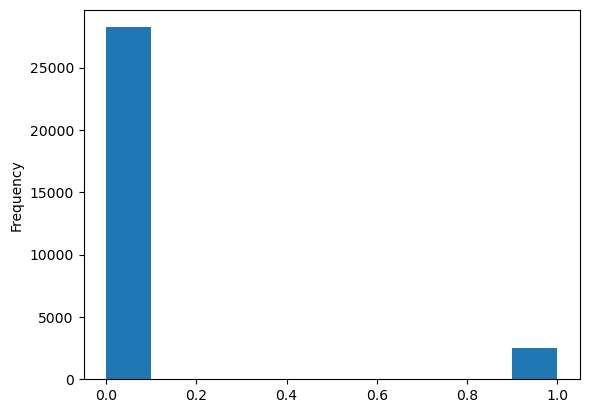

In [4]:
app_train['TARGET'].astype(int).plot.hist();

In [5]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [6]:
missing_values = missing_values_table(app_train)
missing_values.head(20)

Your selected dataframe has 122 columns.
There are 66 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,21400,69.6
COMMONAREA_AVG,21400,69.6
COMMONAREA_MODE,21400,69.6
NONLIVINGAPARTMENTS_MEDI,21256,69.1
NONLIVINGAPARTMENTS_MODE,21256,69.1
NONLIVINGAPARTMENTS_AVG,21256,69.1
FONDKAPREMONT_MODE,20935,68.1
LIVINGAPARTMENTS_MODE,20932,68.1
LIVINGAPARTMENTS_MEDI,20932,68.1
LIVINGAPARTMENTS_AVG,20932,68.1


In [7]:


# Number of each type of column
app_train.dtypes.value_counts()



float64    65
int64      41
object     16
dtype: int64

In [8]:
# Number of unique classes in each object column
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               7
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [9]:


# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)



3 columns were label encoded.


In [10]:


# one-hot encoding of categorical variables
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)



Training Features shape:  (30751, 242)
Testing Features shape:  (4874, 235)


In [11]:


train_labels = app_train['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

# Add the target back in
app_train['TARGET'] = train_labels

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)



Training Features shape:  (30751, 236)
Testing Features shape:  (4874, 235)


In [12]:
(app_train['DAYS_BIRTH'] / -365).describe()

count    30751.000000
mean        43.916730
std         11.981446
min         21.021918
25%         33.930137
50%         43.164384
75%         53.842466
max         69.032877
Name: DAYS_BIRTH, dtype: float64

In [13]:
app_train['DAYS_EMPLOYED'].describe()

count     30751.000000
mean      63592.480570
std      141080.111821
min      -16852.000000
25%       -2763.000000
50%       -1202.000000
75%        -290.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

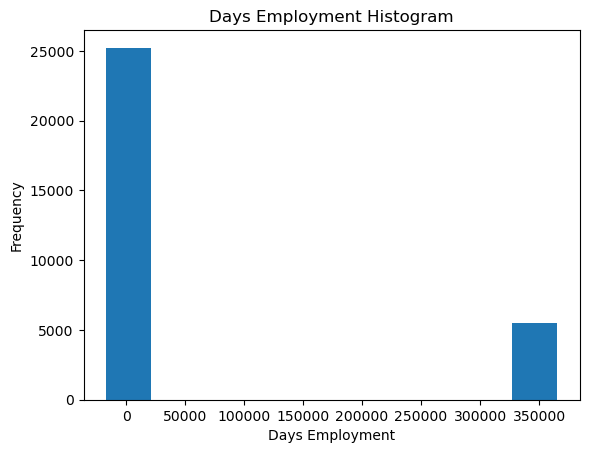

In [14]:
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [15]:


anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]
non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))



The non-anomalies default on 8.73% of loans
The anomalies default on 5.71% of loans
There are 5518 anomalous days of employment


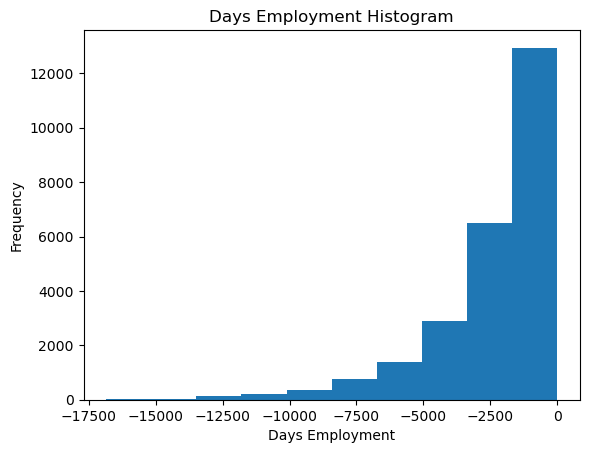

In [16]:


# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');



In [17]:
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

print('There are %d anomalies in the test data out of %d entries' % (app_test["DAYS_EMPLOYED_ANOM"].sum(), len(app_test)))

There are 910 anomalies in the test data out of 4874 entries


In [18]:
# Find correlations with the target and sort
correlations = app_train.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 DAYS_ID_PUBLISH                                      0.045602
OCCUPATION_TYPE_Laborers                             0.047012
REG_CITY_NOT_LIVE_CITY                               0.049688
OWN_CAR_AGE                                          0.049910
NAME_EDUCATION_TYPE_Secondary / secondary special    0.053519
CODE_GENDER_M                                        0.059751
REG_CITY_NOT_WORK_CITY                               0.060342
DAYS_LAST_PHONE_CHANGE                               0.060939
NAME_INCOME_TYPE_Working                             0.062097
REGION_RATING_CLIENT_W_CITY                          0.065193
REGION_RATING_CLIENT                                 0.065907
DAYS_BIRTH                                           0.078870
DAYS_EMPLOYED                                        0.078916
TARGET                                               1.000000
FLAG_MOBIL                                                NaN
Name: TARGET, dtype: float64

Most Negati

In [19]:
# Find the correlation of the positive days since birth and target
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

-0.07886998474976799

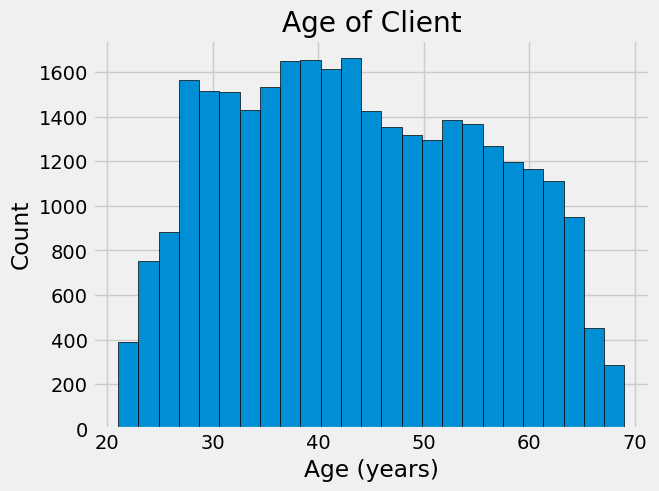

In [20]:


# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(app_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');



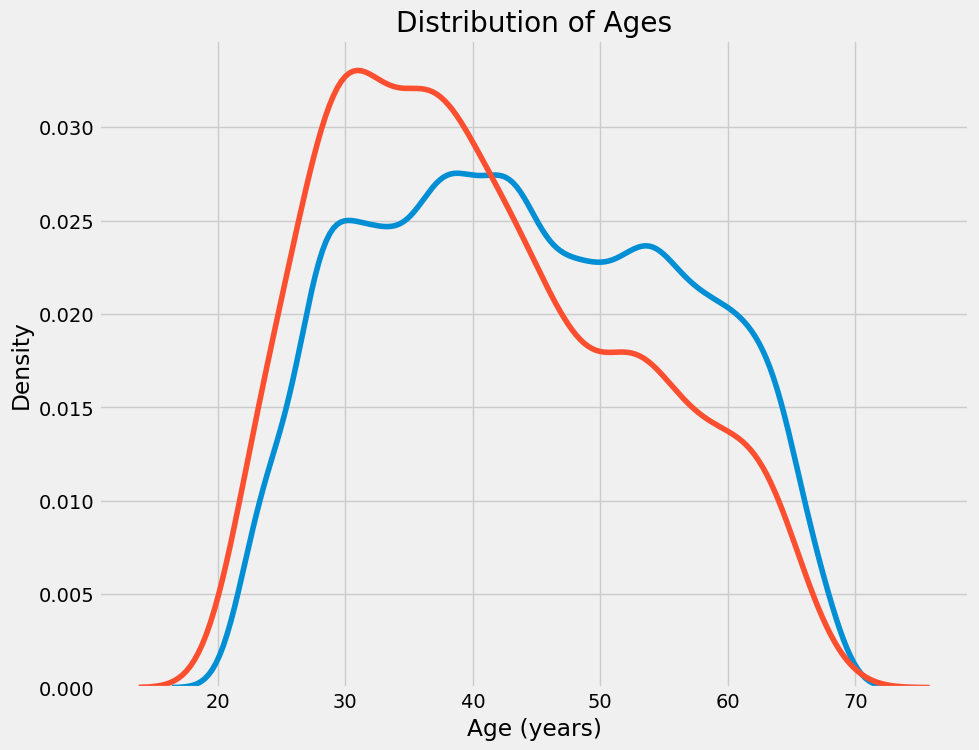

In [21]:


plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');



In [22]:


# Age information into a separate dataframe
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)



,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,0,13297,36.430137,"(35.0, 40.0]"
1,0,14778,40.487671,"(40.0, 45.0]"
2,0,17907,49.060274,"(45.0, 50.0]"
3,0,19626,53.769863,"(50.0, 55.0]"
4,0,20327,55.690411,"(55.0, 60.0]"
5,0,19130,52.410959,"(50.0, 55.0]"
6,0,15722,43.073973,"(40.0, 45.0]"
7,0,10801,29.591781,"(25.0, 30.0]"
8,0,23516,64.427397,"(60.0, 65.0]"
9,0,8755,23.986301,"(20.0, 25.0]"


In [23]:


# Group by the bin and calculate averages
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups



,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.130506,8540.134584,23.397629
"(25.0, 30.0]",0.107303,10151.863487,27.813325
"(30.0, 35.0]",0.104043,11843.546485,32.448073
"(35.0, 40.0]",0.099197,13694.250590,37.518495
"(40.0, 45.0]",0.078903,15503.828605,42.476243
"(45.0, 50.0]",0.066246,17333.309722,47.488520
"(50.0, 55.0]",0.064246,19193.748324,52.585612
"(55.0, 60.0]",0.057152,20980.570572,57.481015
"(60.0, 65.0]",0.061900,22778.133049,62.405844


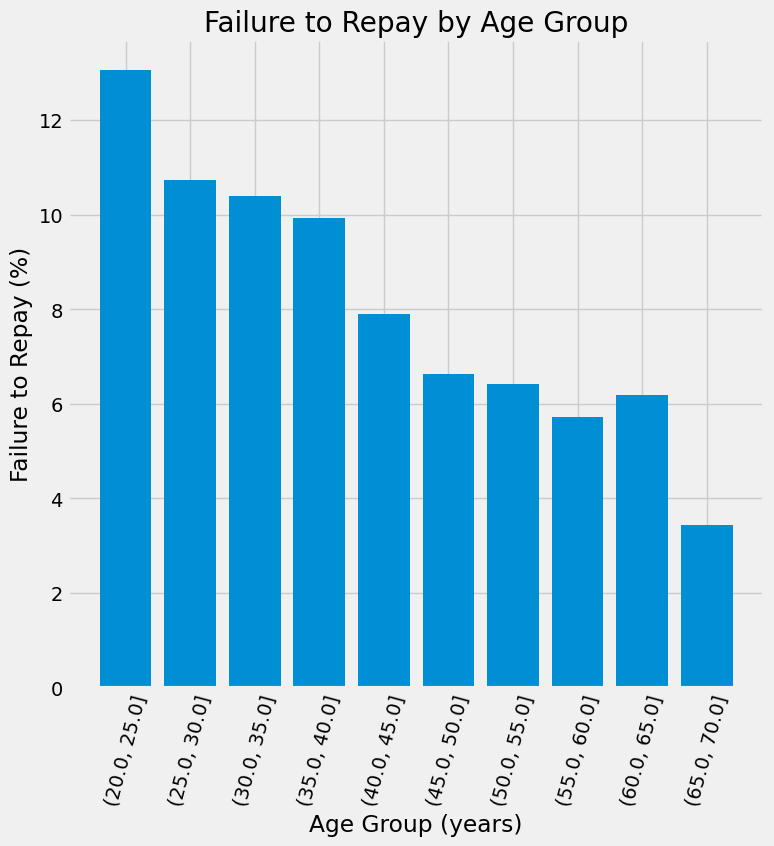

In [24]:


plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');



In [25]:
# Extract the EXT_SOURCE variables and show correlations
ext_data = app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.164484,-0.171224,-0.170964,-0.078870
EXT_SOURCE_1,-0.164484,1.000000,0.214864,0.168366,0.607394
EXT_SOURCE_2,-0.171224,0.214864,1.000000,0.105198,0.096011
EXT_SOURCE_3,-0.170964,0.168366,0.105198,1.000000,0.207234
DAYS_BIRTH,-0.078870,0.607394,0.096011,0.207234,1.000000


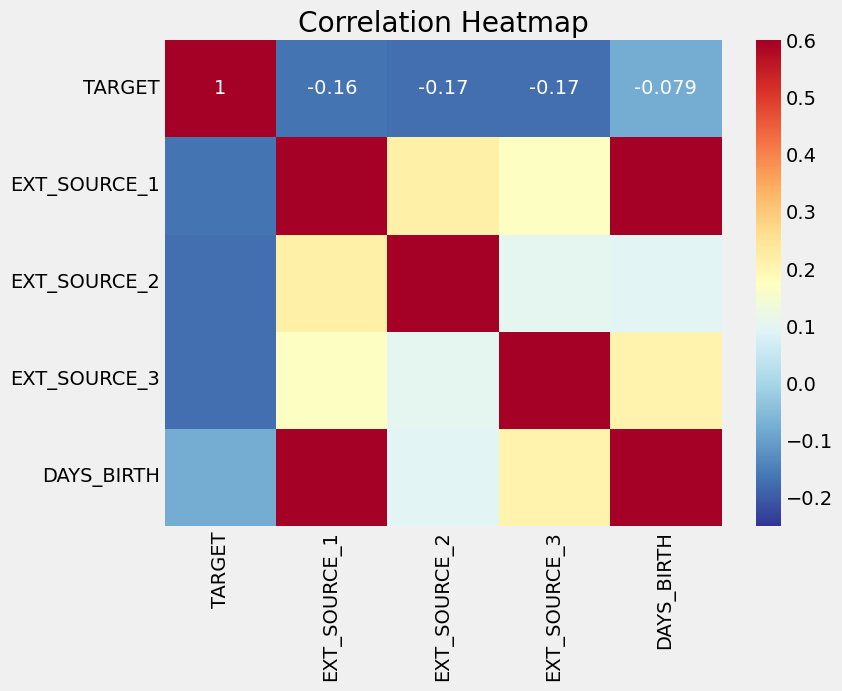

In [26]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

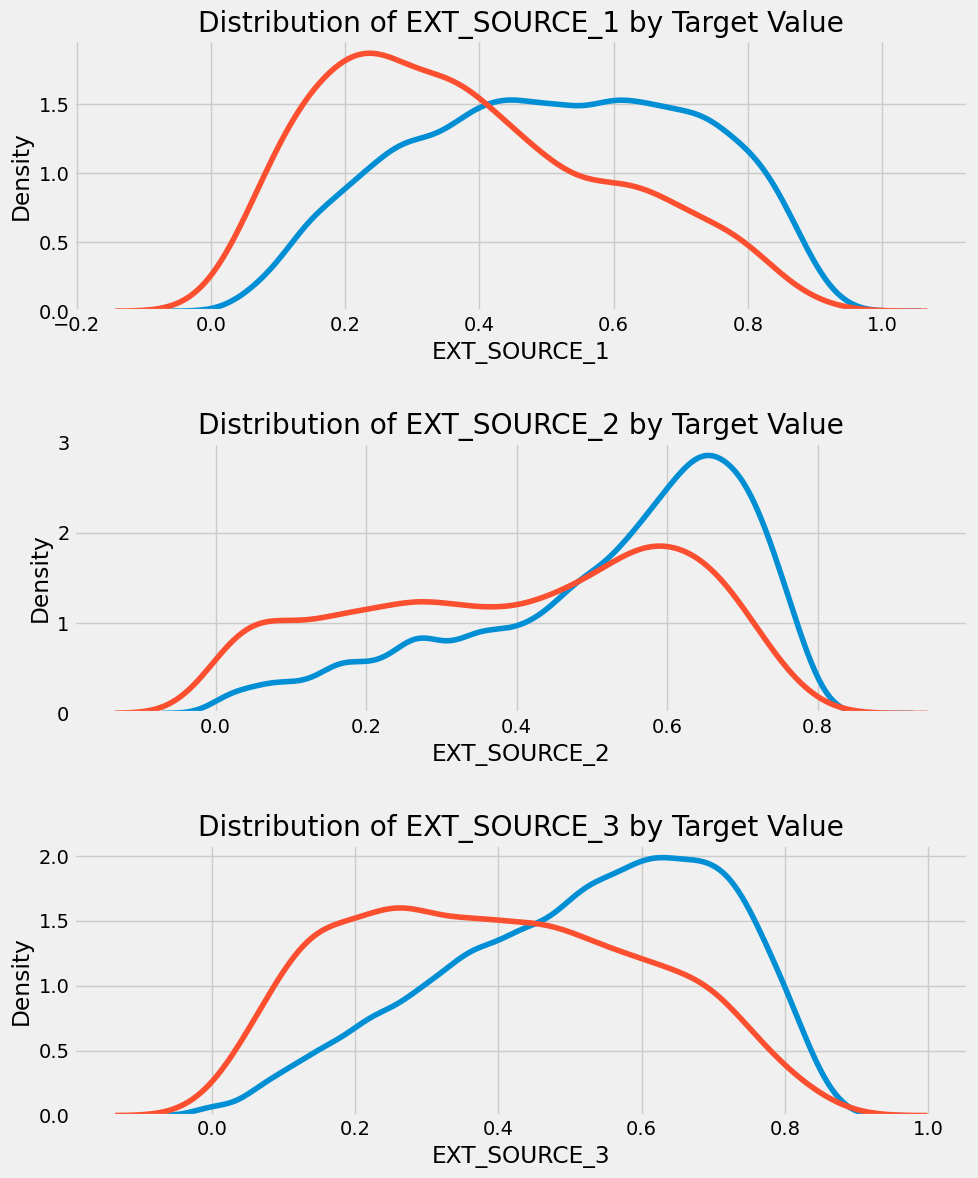

In [27]:
plt.figure(figsize = (10, 12))

# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, source], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, source], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

In [28]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures

# Assuming app_train and app_test are already defined as pandas DataFrames

# Select relevant columns for polynomial features
poly_features = app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]
poly_features_test = app_test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

# Imputer for handling missing values
imputer = SimpleImputer(strategy='median')

poly_target = poly_features['TARGET']

poly_features = poly_features.drop(columns=['TARGET'])

# Need to impute missing values
poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.transform(poly_features_test)

# Create the polynomial object with specified degree
poly_transformer = PolynomialFeatures(degree=3)

# Fit and transform the training data
poly_features = poly_transformer.fit_transform(poly_features)

# Transform the testing data
poly_features_test = poly_transformer.transform(poly_features_test)

# Convert back to DataFrame for easier handling
poly_features_df = pd.DataFrame(poly_features, columns=poly_transformer.get_feature_names_out(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']))
poly_features_test_df = pd.DataFrame(poly_features_test, columns=poly_transformer.get_feature_names_out(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Add the target back to the DataFrame
poly_features_df['TARGET'] = poly_target.values

poly_features_df['TARGET'] = poly_target.values






In [29]:


# Train the polynomial features
poly_transformer.fit(poly_features)

# Transform the features
poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
print('Polynomial Features shape: ', poly_features.shape)



Polynomial Features shape:  (30751, 8436)


In [30]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures

# Assuming app_train and app_test are already defined as pandas DataFrames

# Select relevant columns for polynomial features
poly_features = app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]
poly_features_test = app_test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

# Imputer for handling missing values
imputer = SimpleImputer(strategy='median')

poly_target = poly_features['TARGET']

poly_features = poly_features.drop(columns=['TARGET'])

# Need to impute missing values
poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.transform(poly_features_test)

# Create the polynomial object with specified degree
poly_transformer = PolynomialFeatures(degree=3)

# Fit and transform the training data
poly_features = poly_transformer.fit_transform(poly_features)

# Transform the testing data
poly_features_test = poly_transformer.transform(poly_features_test)

# Get feature names
feature_names = poly_transformer.get_feature_names_out(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])

# Convert back to DataFrame for easier handling
poly_features_df = pd.DataFrame(poly_features, columns=feature_names)
poly_features_test_df = pd.DataFrame(poly_features_test, columns=feature_names)

# Add the target back to the DataFrame
poly_features_df['TARGET'] = poly_target.values

# Display the first 15 feature names
print(feature_names[:15])




['1' 'EXT_SOURCE_1' 'EXT_SOURCE_2' 'EXT_SOURCE_3' 'DAYS_BIRTH'
 'EXT_SOURCE_1^2' 'EXT_SOURCE_1 EXT_SOURCE_2' 'EXT_SOURCE_1 EXT_SOURCE_3'
 'EXT_SOURCE_1 DAYS_BIRTH' 'EXT_SOURCE_2^2' 'EXT_SOURCE_2 EXT_SOURCE_3'
 'EXT_SOURCE_2 DAYS_BIRTH' 'EXT_SOURCE_3^2' 'EXT_SOURCE_3 DAYS_BIRTH'
 'DAYS_BIRTH^2']


In [31]:


# Create a dataframe of the features 
poly_features = pd.DataFrame(poly_features, 
                             columns = poly_transformer.get_feature_names_out(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                           'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Add in the target
poly_features['TARGET'] = poly_target

# Find the correlations with the target
poly_corrs = poly_features.corr()['TARGET'].sort_values()

# Display most negative and most positive
print(poly_corrs.head(10))
print(poly_corrs.tail(5))



EXT_SOURCE_2 EXT_SOURCE_3                -0.194412
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.191949
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH     -0.181166
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.178069
EXT_SOURCE_1 EXT_SOURCE_2                -0.176400
EXT_SOURCE_2                             -0.171304
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.169840
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.165961
EXT_SOURCE_2 DAYS_BIRTH                  -0.164311
EXT_SOURCE_1 EXT_SOURCE_2 DAYS_BIRTH     -0.162830
Name: TARGET, dtype: float64
DAYS_BIRTH     -0.078870
DAYS_BIRTH^2   -0.076485
DAYS_BIRTH^3   -0.073271
TARGET          1.000000
1                    NaN
Name: TARGET, dtype: float64


In [32]:
# Put test features into dataframe
poly_features_test = pd.DataFrame(poly_features_test, 
                                  columns = poly_transformer.get_feature_names_out(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                                'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Merge polynomial features into training dataframe
poly_features['SK_ID_CURR'] = app_train['SK_ID_CURR']
app_train_poly = app_train.merge(poly_features, on = 'SK_ID_CURR', how = 'left')

# Merge polnomial features into testing dataframe
poly_features_test['SK_ID_CURR'] = app_test['SK_ID_CURR']
app_test_poly = app_test.merge(poly_features_test, on = 'SK_ID_CURR', how = 'left')

# Align the dataframes
app_train_poly, app_test_poly = app_train_poly.align(app_test_poly, join = 'inner', axis = 1)

# Print out the new shapes
print('Training data with polynomial features shape: ', app_train_poly.shape)
print('Testing data with polynomial features shape:  ', app_test_poly.shape)

Training data with polynomial features shape:  (30751, 271)
Testing data with polynomial features shape:   (4874, 271)


In [33]:
app_train_domain = app_train.copy()
app_test_domain = app_test.copy()

app_train_domain['CREDIT_INCOME_PERCENT'] = app_train_domain['AMT_CREDIT'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['ANNUITY_INCOME_PERCENT'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['CREDIT_TERM'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_CREDIT']
app_train_domain['DAYS_EMPLOYED_PERCENT'] = app_train_domain['DAYS_EMPLOYED'] / app_train_domain['DAYS_BIRTH']

In [34]:
app_test_domain['CREDIT_INCOME_PERCENT'] = app_test_domain['AMT_CREDIT'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['ANNUITY_INCOME_PERCENT'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['CREDIT_TERM'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_CREDIT']
app_test_domain['DAYS_EMPLOYED_PERCENT'] = app_test_domain['DAYS_EMPLOYED'] / app_test_domain['DAYS_BIRTH']

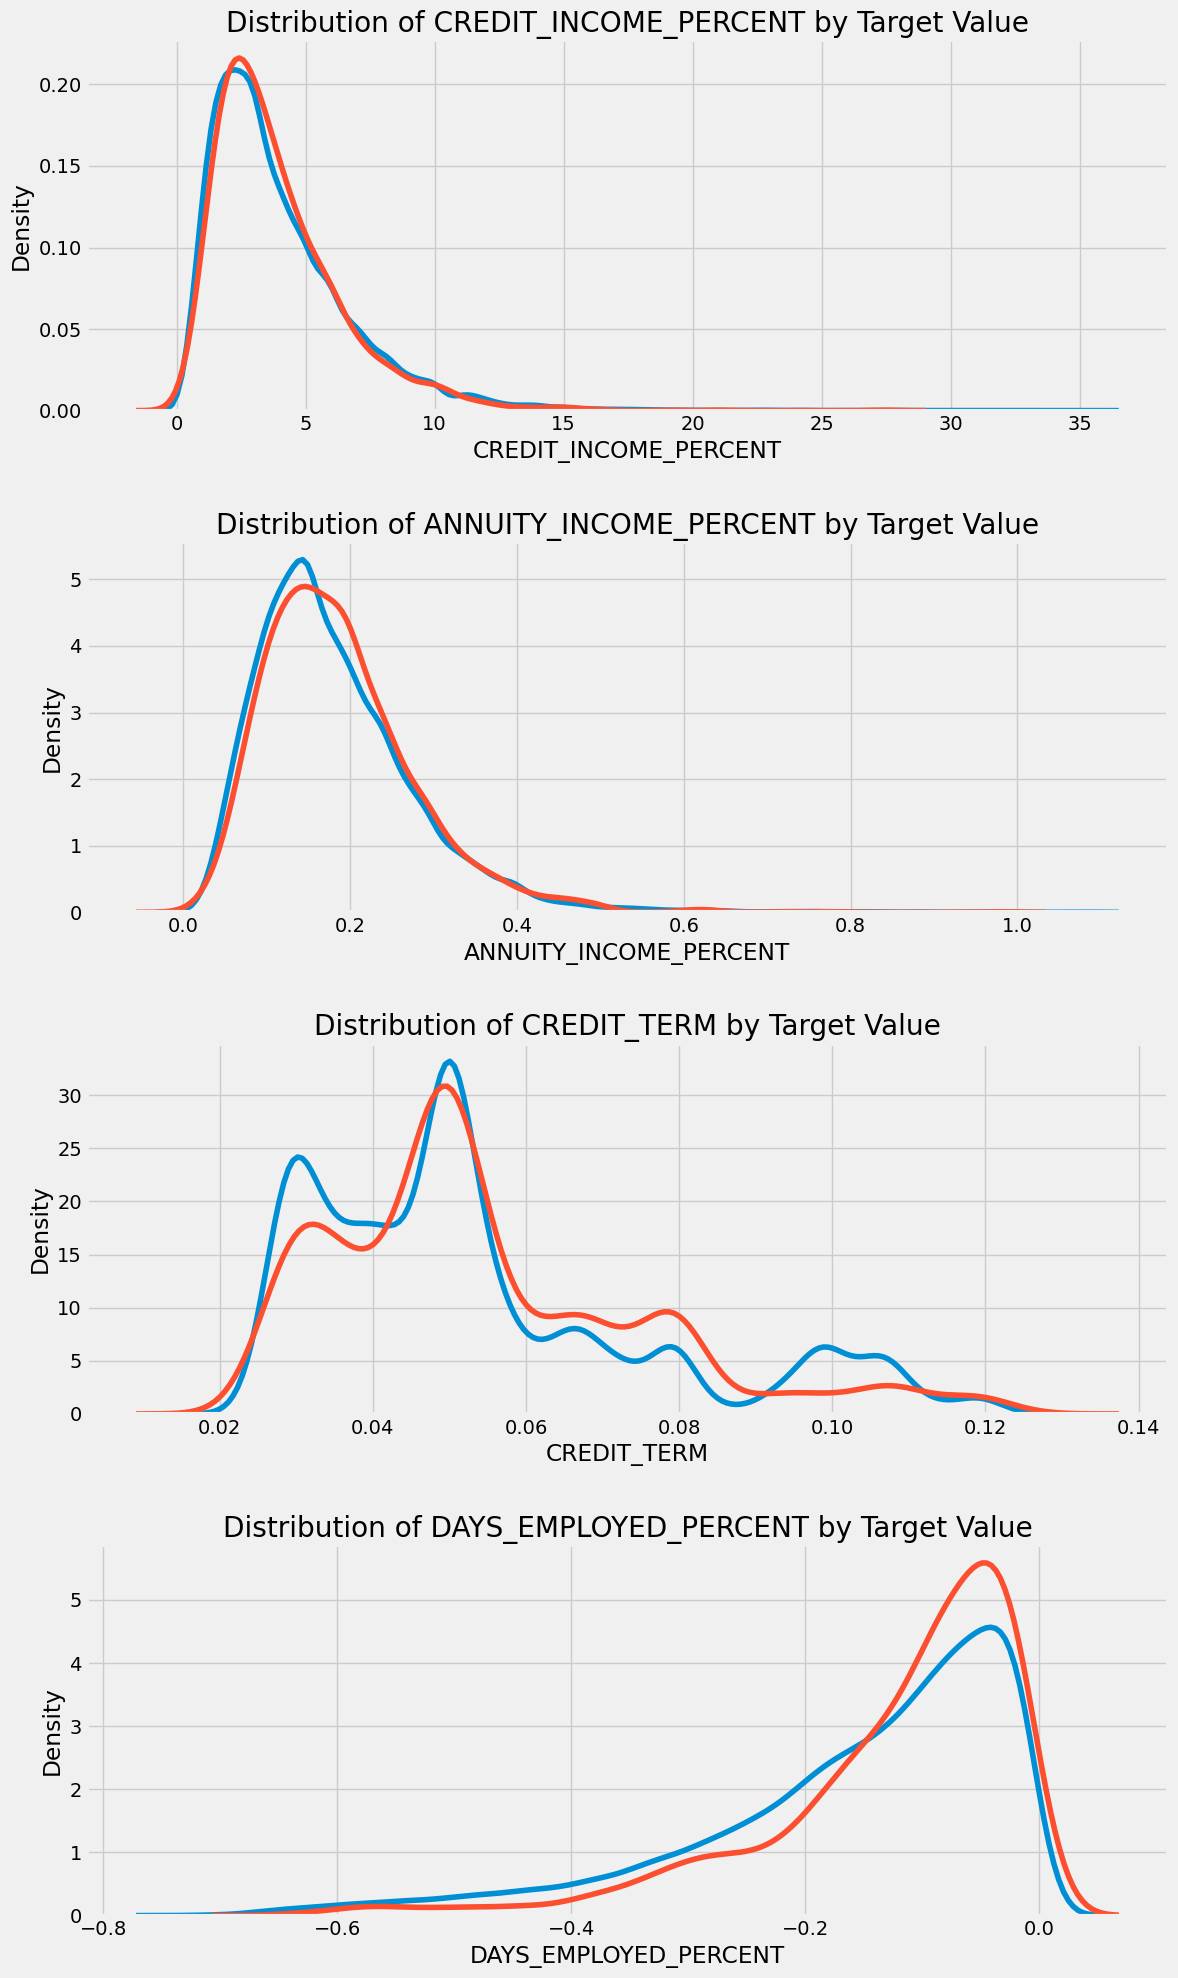

In [35]:
plt.figure(figsize = (12, 20))
# iterate through the new features
for i, feature in enumerate(['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']):
    
    # create a new subplot for each source
    plt.subplot(4, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 0, feature], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 1, feature], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % feature)
    plt.xlabel('%s' % feature); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

In [36]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

# Drop the target from the training data
if 'TARGET' in app_train:
    train = app_train.drop(columns=['TARGET'])
else:
    train = app_train.copy()
    
# Feature names
features = list(train.columns)

# Copy of the testing data
test = app_test.copy()

# Median imputation of missing values
imputer = SimpleImputer(strategy='median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit on the training data
imputer.fit(train)

# Transform both training and testing data
train = imputer.transform(train)
test = imputer.transform(test)

# Repeat with the scaler
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)


Training data shape:  (30751, 236)
Testing data shape:  (4874, 236)


In [37]:
import missingno as msno


In [38]:
from sklearn.linear_model import LogisticRegression

# Make the model with the specified regularization parameter
log_reg = LogisticRegression(C = 0.0001)

# Train on the training data
log_reg.fit(train, train_labels)

LogisticRegression(C=0.0001)

In [39]:


# Make predictions
# Make sure to select the second column only
log_reg_pred = log_reg.predict_proba(test)[:, 1]



In [40]:


# Submission dataframe
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = log_reg_pred

submit.head()



,SK_ID_CURR,TARGET
0,208550,0.079149
1,173779,0.075320
2,365820,0.080647
3,144092,0.087070
4,291599,0.085085


In [41]:


# Save the submission to a csv file
submit.to_csv('log_reg_baseline.csv', index = False)



In [42]:
import numpy as np
import pandas as pd
import gc
import time
import re
from contextlib import contextmanager
import missingno as msno

import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py
import seaborn as sns

# Scikit-learn
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from lightgbm import LGBMClassifier
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score,fbeta_score, make_scorer

from sklearn.model_selection import KFold, StratifiedKFold
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

# MLFlow
import mlflow
import mlflow.lightgbm
import mlflow.xgboost
from mlflow import MlflowClient
from mlflow.models.signature import infer_signature
from pprint import pprint

# Evidently
import evidently
from evidently import ColumnMapping
from evidently.report import Report
from evidently.metrics.base_metric import generate_column_metrics
from evidently.metric_preset import DataDriftPreset
from evidently.metrics import *

In [43]:
####################################
# FONCTIONS DE FEATURE ENGINEERING #
###################################

# Most features are created by applying min, max, mean, sum and var functions to grouped tables. 
# Little feature selection is done and overfitting might be a problem since many features are related.
# The following key ideas were used:
# - Divide or subtract important features to get rates (like annuity and income, Payment Rate)
# - In Bureau Data: create specific features for Active credits and Closed credits
# - In Previous Applications: create specific features for Approved and Refused applications
# - Modularity: one function for each table (except bureau_balance and application_test)
# - One-hot encoding for categorical features
# All tables are joined with the application data using the SK_ID_CURR key (except bureau_balance).

@contextmanager

def timer(title):
    t0 = time.time()
    yield
    print("{} - done in {:.0f}s".format(title, time.time() - t0))

# One-hot encoding for categorical columns with get_dummies
def one_hot_encoder(data, nan_as_category = True):
    original_columns = list(data.columns)
    categorical_columns = [col for col in data.columns if data[col].dtype == 'object']
    data = pd.get_dummies(data, columns= categorical_columns, dummy_na= nan_as_category)
    new_columns = [c for c in data.columns if c not in original_columns]
    return data, new_columns

# Preprocess application_train.csv and application_test.csv
def application_train_test(num_rows = None, nan_as_category = False):
    # Read data and merge
    data = pd.read_csv('application_train.csv', nrows= num_rows)
    
    test_data = pd.read_csv('application_test.csv', nrows= num_rows)
    print("application_test samples: {}".format(len(data)))

    print("application_train samples: {}, application_test samples: {}".format(len(data), len(test_data)))
    data = data.append(test_data).reset_index()
    # Optional: Remove 4 applications with XNA CODE_GENDER (train set)
    data = data[data['CODE_GENDER'] != 'XNA'] # 4 lignes avec le code XNA pour CODE_GENDER qu'on ne retrouve pas dans le testset
    
    # Categorical features with Binary encode (0 or 1; two categories)
    for bin_feature in ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']: # les variables avec 2 catégories
        data[bin_feature], uniques = pd.factorize(data[bin_feature])
    # Categorical features with One-Hot encode
    data, cat_cols = one_hot_encoder(data, nan_as_category)
    
    # NaN values for DAYS_EMPLOYED: 365.243 -> nan  (valeur aberrante)
    data['DAYS_EMPLOYED'].replace(365243, np.nan, inplace= True)
    # LZ - NaN values for AMT_INCOME_TOTAL: 1.170000e+08 -> nan  (valeur aberrante)
    data['AMT_INCOME_TOTAL'].replace(1.170000e+08, np.nan, inplace= True)
    
    # Some simple new features (percentages)
    data['DAYS_EMPLOYED_PERC'] = data['DAYS_EMPLOYED'] / data['DAYS_BIRTH']
    data['INCOME_CREDIT_PERC'] = data['AMT_INCOME_TOTAL'] / data['AMT_CREDIT']
    data['INCOME_PER_PERSON'] = data['AMT_INCOME_TOTAL'] / data['CNT_FAM_MEMBERS']
    data['ANNUITY_INCOME_PERC'] = data['AMT_ANNUITY'] / data['AMT_INCOME_TOTAL']
    data['PAYMENT_RATE'] = data['AMT_ANNUITY'] / data['AMT_CREDIT']
    del test_data
    gc.collect()
    return data

# Preprocess bureau.csv and bureau_balance.csv
def bureau_and_balance(num_rows = None, nan_as_category = True):
    bureau = pd.read_csv('bureau.csv', nrows = num_rows)
    bb = pd.read_csv('bureau_balance.csv', nrows = num_rows)
    bb, bb_cat = one_hot_encoder(bb, nan_as_category)
    bureau, bureau_cat = one_hot_encoder(bureau, nan_as_category)
    
    # Bureau balance: Perform aggregations and merge with bureau.csv
    bb_aggregations = {'MONTHS_BALANCE': ['min', 'max', 'size']}
    for col in bb_cat:
        bb_aggregations[col] = ['mean']
    bb_agg = bb.groupby('SK_ID_BUREAU').agg(bb_aggregations)
    bb_agg.columns = pd.Index([e[0] + "_" + e[1].upper() for e in bb_agg.columns.tolist()])
    bureau = bureau.join(bb_agg, how='left', on='SK_ID_BUREAU')
    bureau.drop(['SK_ID_BUREAU'], axis=1, inplace= True)
    del bb, bb_agg
    gc.collect()
    
    # Bureau and bureau_balance numeric features
    num_aggregations = {
        'DAYS_CREDIT': ['min', 'max', 'mean', 'var'],
        'DAYS_CREDIT_ENDDATE': ['min', 'max', 'mean'],
        'DAYS_CREDIT_UPDATE': ['mean'],
        'CREDIT_DAY_OVERDUE': ['max', 'mean'],
        'AMT_CREDIT_MAX_OVERDUE': ['mean'],
        'AMT_CREDIT_SUM': ['max', 'mean', 'sum'],
        'AMT_CREDIT_SUM_DEBT': ['max', 'mean', 'sum'],
        'AMT_CREDIT_SUM_OVERDUE': ['mean'],
        'AMT_CREDIT_SUM_LIMIT': ['mean', 'sum'],
        'AMT_ANNUITY': ['max', 'mean'],
        'CNT_CREDIT_PROLONG': ['sum'],
        'MONTHS_BALANCE_MIN': ['min'],
        'MONTHS_BALANCE_MAX': ['max'],
        'MONTHS_BALANCE_SIZE': ['mean', 'sum']
    }
    # Bureau and bureau_balance categorical features
    cat_aggregations = {}
    for cat in bureau_cat: cat_aggregations[cat] = ['mean']
    for cat in bb_cat: cat_aggregations[cat + "_MEAN"] = ['mean']
    
    bureau_agg = bureau.groupby('SK_ID_CURR').agg({**num_aggregations, **cat_aggregations})
    bureau_agg.columns = pd.Index(['BURO_' + e[0] + "_" + e[1].upper() for e in bureau_agg.columns.tolist()])
    # Bureau: Active credits - using only numerical aggregations
    active = bureau[bureau['CREDIT_ACTIVE_Active'] == 1]
    active_agg = active.groupby('SK_ID_CURR').agg(num_aggregations)
    active_agg.columns = pd.Index(['ACTIVE_' + e[0] + "_" + e[1].upper() for e in active_agg.columns.tolist()])
    bureau_agg = bureau_agg.join(active_agg, how='left', on='SK_ID_CURR')
    del active, active_agg
    gc.collect()
    # Bureau: Closed credits - using only numerical aggregations
    closed = bureau[bureau['CREDIT_ACTIVE_Closed'] == 1]
    closed_agg = closed.groupby('SK_ID_CURR').agg(num_aggregations)
    closed_agg.columns = pd.Index(['CLOSED_' + e[0] + "_" + e[1].upper() for e in closed_agg.columns.tolist()])
    bureau_agg = bureau_agg.join(closed_agg, how='left', on='SK_ID_CURR')
    del closed, closed_agg, bureau
    gc.collect()
    return bureau_agg

# Preprocess previous_applications.csv
def previous_applications(num_rows = None, nan_as_category = True):
    prev = pd.read_csv('previous_application.csv', nrows = num_rows)
    prev, cat_cols = one_hot_encoder(prev, nan_as_category= True)
    # Days 365.243 values -> nan
    prev['DAYS_FIRST_DRAWING'].replace(365243, np.nan, inplace= True)
    prev['DAYS_FIRST_DUE'].replace(365243, np.nan, inplace= True)
    prev['DAYS_LAST_DUE_1ST_VERSION'].replace(365243, np.nan, inplace= True)
    prev['DAYS_LAST_DUE'].replace(365243, np.nan, inplace= True)
    prev['DAYS_TERMINATION'].replace(365243, np.nan, inplace= True)
    # Add feature: value ask / value received percentage
    prev['APP_CREDIT_PERC'] = prev['AMT_APPLICATION'] / prev['AMT_CREDIT']
    # Previous applications numeric features
    num_aggregations = {
        'AMT_ANNUITY': ['min', 'max', 'mean'],
        'AMT_APPLICATION': ['min', 'max', 'mean'],
        'AMT_CREDIT': ['min', 'max', 'mean'],
        'APP_CREDIT_PERC': ['min', 'max', 'mean', 'var'],
        'AMT_DOWN_PAYMENT': ['min', 'max', 'mean'],
        'AMT_GOODS_PRICE': ['min', 'max', 'mean'],
        'HOUR_APPR_PROCESS_START': ['min', 'max', 'mean'],
        'RATE_DOWN_PAYMENT': ['min', 'max', 'mean'],
        'DAYS_DECISION': ['min', 'max', 'mean'],
        'CNT_PAYMENT': ['mean', 'sum'],
    }
    # Previous applications categorical features
    cat_aggregations = {}
    for cat in cat_cols:
        cat_aggregations[cat] = ['mean']
    
    prev_agg = prev.groupby('SK_ID_CURR').agg({**num_aggregations, **cat_aggregations})
    prev_agg.columns = pd.Index(['PREV_' + e[0] + "_" + e[1].upper() for e in prev_agg.columns.tolist()])
    # Previous Applications: Approved Applications - only numerical features
    approved = prev[prev['NAME_CONTRACT_STATUS_Approved'] == 1]
    approved_agg = approved.groupby('SK_ID_CURR').agg(num_aggregations)
    approved_agg.columns = pd.Index(['APPROVED_' + e[0] + "_" + e[1].upper() for e in approved_agg.columns.tolist()])
    prev_agg = prev_agg.join(approved_agg, how='left', on='SK_ID_CURR')
    # Previous Applications: Refused Applications - only numerical features
    refused = prev[prev['NAME_CONTRACT_STATUS_Refused'] == 1]
    refused_agg = refused.groupby('SK_ID_CURR').agg(num_aggregations)
    refused_agg.columns = pd.Index(['REFUSED_' + e[0] + "_" + e[1].upper() for e in refused_agg.columns.tolist()])
    prev_agg = prev_agg.join(refused_agg, how='left', on='SK_ID_CURR')
    del refused, refused_agg, approved, approved_agg, prev
    gc.collect()
    return prev_agg

# Preprocess POS_CASH_balance.csv
def pos_cash(num_rows = None, nan_as_category = True):
    pos = pd.read_csv('POS_CASH_balance.csv', nrows = num_rows)
    pos, cat_cols = one_hot_encoder(pos, nan_as_category= True)
    # Features
    aggregations = {
        'MONTHS_BALANCE': ['max', 'mean', 'size'],
        'SK_DPD': ['max', 'mean'],
        'SK_DPD_DEF': ['max', 'mean']
    }
    for cat in cat_cols:
        aggregations[cat] = ['mean']
    
    pos_agg = pos.groupby('SK_ID_CURR').agg(aggregations)
    pos_agg.columns = pd.Index(['POS_' + e[0] + "_" + e[1].upper() for e in pos_agg.columns.tolist()])
    # Count pos cash accounts
    pos_agg['POS_COUNT'] = pos.groupby('SK_ID_CURR').size()
    del pos
    gc.collect()
    return pos_agg
    
# Preprocess installments_payments.csv
def installments_payments(num_rows = None, nan_as_category = True):
    ins = pd.read_csv('installments_payments.csv', nrows = num_rows)
    ins, cat_cols = one_hot_encoder(ins, nan_as_category= True)
    # Percentage and difference paid in each installment (amount paid and installment value)
    ins['PAYMENT_PERC'] = ins['AMT_PAYMENT'] / ins['AMT_INSTALMENT']
    ins['PAYMENT_DIFF'] = ins['AMT_INSTALMENT'] - ins['AMT_PAYMENT']
    # Days past due and days before due (no negative values)
    ins['DPD'] = ins['DAYS_ENTRY_PAYMENT'] - ins['DAYS_INSTALMENT']
    ins['DBD'] = ins['DAYS_INSTALMENT'] - ins['DAYS_ENTRY_PAYMENT']
    ins['DPD'] = ins['DPD'].apply(lambda x: x if x > 0 else 0)
    ins['DBD'] = ins['DBD'].apply(lambda x: x if x > 0 else 0)
    # Features: Perform aggregations
    aggregations = {
        'NUM_INSTALMENT_VERSION': ['nunique'],
        'DPD': ['max', 'mean', 'sum'],
        'DBD': ['max', 'mean', 'sum'],
        'PAYMENT_PERC': ['max', 'mean', 'sum', 'var'],
        'PAYMENT_DIFF': ['max', 'mean', 'sum', 'var'],
        'AMT_INSTALMENT': ['max', 'mean', 'sum'],
        'AMT_PAYMENT': ['min', 'max', 'mean', 'sum'],
        'DAYS_ENTRY_PAYMENT': ['max', 'mean', 'sum']
    }
    for cat in cat_cols:
        aggregations[cat] = ['mean']
    ins_agg = ins.groupby('SK_ID_CURR').agg(aggregations)
    ins_agg.columns = pd.Index(['INSTAL_' + e[0] + "_" + e[1].upper() for e in ins_agg.columns.tolist()])
    # Count installments accounts
    ins_agg['INSTAL_COUNT'] = ins.groupby('SK_ID_CURR').size()
    del ins
    gc.collect()
    return ins_agg

# Preprocess credit_card_balance.csv
def credit_card_balance(num_rows = None, nan_as_category = True):
    cc = pd.read_csv('credit_card_balance.csv', nrows = num_rows)
    cc, cat_cols = one_hot_encoder(cc, nan_as_category= True)
    # General aggregations
    cc.drop(['SK_ID_PREV'], axis= 1, inplace = True)
    cc_agg = cc.groupby('SK_ID_CURR').agg(['min', 'max', 'mean', 'sum', 'var'])
    cc_agg.columns = pd.Index(['CC_' + e[0] + "_" + e[1].upper() for e in cc_agg.columns.tolist()])
    # Count credit card lines
    cc_agg['CC_COUNT'] = cc.groupby('SK_ID_CURR').size()
    del cc
    gc.collect()
    return cc_agg


#############################################
# Fonction complète de feature engineering #
############################################
def feature_engineering(num_rows=None):
    
    data = application_train_test(num_rows)
    with timer("Process bureau and bureau_balance"):
        bureau = bureau_and_balance(num_rows)
        print("Bureau data shape:", bureau.shape)
        data = data.join(bureau, how='left', on='SK_ID_CURR')
        del bureau
        gc.collect()
    with timer("Process previous_applications"):
        prev = previous_applications(num_rows)
        print("Previous applications data shape:", prev.shape)
        data = data.join(prev, how='left', on='SK_ID_CURR')
        del prev
        gc.collect()
    with timer("Process POS-CASH balance"):
        pos = pos_cash(num_rows)
        print("Pos-cash balance data shape:", pos.shape)
        data = data.join(pos, how='left', on='SK_ID_CURR')
        del pos
        gc.collect()
    with timer("Process installments payments"):
        ins = installments_payments(num_rows)
        print("Installments payments data shape:", ins.shape)
        data = data.join(ins, how='left', on='SK_ID_CURR')
        del ins
        gc.collect()
    with timer("Process credit card balance"):
        cc = credit_card_balance(num_rows)
        print("Credit card balance data shape:", cc.shape)
        data = data.join(cc, how='left', on='SK_ID_CURR')
        del cc
        gc.collect()
    data.to_csv('data_feature_engin')
    return data

In [44]:
num_rows=None
data = application_train_test(num_rows)
with timer("Process bureau and bureau_balance"):
    bureau = bureau_and_balance(num_rows)
    print("Bureau data shape:", bureau.shape)
    data = data.join(bureau, how='left', on='SK_ID_CURR') 

application_test samples: 30751
application_train samples: 30751, application_test samples: 4874
Bureau data shape: (121385, 113)
Process bureau and bureau_balance - done in 2s


In [45]:
with timer("Process previous_applications"):
    prev = previous_applications(num_rows)
    print("Previous applications dataf shape:", prev.shape)
    data = data.join(prev, how='left', on='SK_ID_CURR')

Previous applications dataf shape: (121441, 247)
Process previous_applications - done in 2s


In [46]:
with timer("Process POS-CASH balance"):
    pos = pos_cash(num_rows)
    print("Pos-cash balance data shape:", pos.shape)
    data = data.join(pos, how='left', on='SK_ID_CURR')

Pos-cash balance data shape: (280507, 17)
Process POS-CASH balance - done in 1s


In [47]:
with timer("Process installments payments"):
    ins = installments_payments(num_rows)
    print("Installments payments data shape:", ins.shape)
    data = data.join(ins, how='left', on='SK_ID_CURR')

Installments payments data shape: (284588, 26)
Process installments payments - done in 2s


In [48]:
with timer("Process credit card balance"):
    cc = credit_card_balance(num_rows)
    print("Credit card balance data shape:", cc.shape)
    data = data.join(cc, how='left', on='SK_ID_CURR')

Credit card balance data shape: (83561, 131)
Process credit card balance - done in 1s


In [49]:
###############################
# FONCTIONS DE PREPROCESSING  #
###############################

# Function to calculate missing values by column
def missing_values_table(data):
    # Taux de valeurs manquantes :
    print("Taux de valeurs manquantes dans le data avant imputatation :" , round(data.isna().mean().mean(),4))
    # Total missing values
    mis_val = data.isnull().sum()
    
    # Percentage of missing values
    mis_val_percent = 100 * data.isnull().sum() / len(data)
    
    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    
    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    
    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
    
    # Print some summary information
    print ("Your selected dataframe has " + str(data.shape[1]) + " columns.\n"
           "There are " + str(mis_val_table_ren_columns.shape[0]) +
           " columns that have missing values.")
    
    # Return the dataframe with missing information
    return mis_val_table_ren_columns


# Imputation des valeurs manquantes
def missing_values_imputation(data) :
    #  Statistiques sur les valeurs manquantes :
    missing_values = missing_values_table(data)
    data.replace([np.inf, -np.inf], np.nan, inplace=True)
    
    # Séparation du jeu de données en jeu de  training/validation et jeu de test
    train_data = data[data['TARGET'].notnull()] # partie du jeu de données qui contient une target
    test_data = data[data['TARGET'].isnull()] # partie du jeu de données qui n'a pas de target
    print(train_data.shape, test_data.shape)
    train_data["TARGET"].value_counts()/train_data.shape[0]
    
    # Taux de valeurs manquantes :
    print("Taux de valeurs manquantes dans jeu de train avant imputatation :" , round(train_data.isna().mean().mean(),4))
    print("Taux de valeurs manquantes dans jeu de test avant imputatation :" , round(test_data.isna().mean().mean(),4))
    
    # Imputation des valeurs manquantes avec un KNN ( defaut k =5)
    with timer("Imputation des valeurs manquantes avec KNN"):
        knn_imputer = KNNImputer()
        #fit and transform 
        train_data_imputed=knn_imputer.fit_transform(train_data)
        test_data_imputed=knn_imputer.transform(test_data)
        train_data_imputed = pd.DataFrame(train_data_imputed, columns = train_data.columns)
        test_data_imputed = pd.DataFrame(test_data_imputed, columns = test_data.columns)

    feats_test = [f for f in test_data.columns if f not in ['TARGET']]
    test_data_imputed=test_data_imputed.filter(feats_test)
    # Taux de valeurs manquantes :
    print("Taux de valeurs manquantes après imputatation - jeu de train:" , round(train_data_imputed.isna().mean().mean(),4))
    print("Taux de valeurs manquantes après imputatation - jeu de test:" , round(test_data_imputed.isna().mean().mean(),4))
    
    return train_data_imputed,test_data_imputed



# Traitement du déséquilibre de classe de la target avec SMOTE
def umbalanced_data_SMOTE(train_data_imputed) :
    #y_train
    y_train=train_data_imputed['TARGET']
    y_train 
    
    #X_train
    feats = [f for f in train_data_imputed.columns if f not in ['TARGET','SK_ID_CURR','SK_ID_BUREAU','SK_ID_PREV','index']]
    X_train=train_data_imputed.filter(feats)
    
    # Représentation déséquilibre de la target
    fig,ax=plt.subplots(figsize=(7,6))
    plt.title("Distribution de la target \n(Jeu d'entraînement)", fontsize=15)
    sns.countplot(x='TARGET', data=train_data_imputed)
    for container in ax.containers:
        ax.bar_label(container,size=12,fmt='%.0f')
    plt.show()
   
    # Traitement des classes déséquilibrées avec SMOTE sur le jeu de données d'entraînement
    with timer("Traitement de la target déséquilibrée avec SMOTE"):
        smote = SMOTE()
        # fit predictor and target variable
        X_smote, y_smote = smote.fit_resample(X_train, y_train)
        print('Original dataset shape', y_train.shape)
        print('Resample dataset shape',y_smote.shape) 
        print('SMOTE a crée des données pour que la classe minoritaire ( target = 1 ) ait la même taille que la classe majoritaire.\n',y_smote.value_counts())
    y_smote.value_counts()   
    X_smote.shape
    return X_smote, y_smote


# FONTION COMPLETE DE PREPROCESSING
def preprocessing(data,num_rows=None):
    data = data.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))  # Change columns names ([LightGBM] Do not support special JSON characters in feature name.)
    train_data_imputed,test_data_imputed=missing_values_imputation(data) # Imputation des valeurs manquantes
    X_smote, y_smote=umbalanced_data_SMOTE(train_data_imputed) # traitement du déséquilibre de classe
    return X_smote, y_smote, test_data_imputed

In [50]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from contextlib import contextmanager
import time

@contextmanager
def timer(name):
    start_time = time.time()
    yield
    elapsed_time = time.time() - start_time
    print(f"{name} - done in {elapsed_time:.0f}s")

def missing_values_table(df):
     
    mis_val = df.isnull().sum()

    # 
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    
    
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    
    
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    
    
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    
    
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")
    
    
    return mis_val_table_ren_columns

# Assuming data is a predefined DataFrame
with timer("Imputation des valeurs manquantes"):
    # Statistiques sur les valeurs manquantes :
    missing_values = missing_values_table(data)
    data.replace([np.inf, -np.inf], np.nan, inplace=True)
    
    # Séparation du jeu de données en jeu de training/validation et jeu de test
    train_data = data[data['TARGET'].notnull()] # partie du jeu de données qui contient une target
    test_data = data[data['TARGET'].isnull()] # partie du jeu de données qui n'a pas de target
    print(train_data.shape, test_data.shape)
    train_data["TARGET"].value_counts()/train_data.shape[0]
    
    # Taux de valeurs manquantes :
    print("Taux de valeurs manquantes dans jeu de train avant imputatation :" , round(train_data.isna().mean().mean(),4))
    print("Taux de valeurs manquantes dans jeu de test avant imputatation :" , round(test_data.isna().mean().mean(),4))
    
    # Imputation des valeurs manquantes avec SimpleImputer (median strategy)
    with timer("Imputation des valeurs manquantes avec SimpleImputer"):
        simple_imputer = SimpleImputer(strategy='median')
        
        # Fit and transform
        train_data_imputed = simple_imputer.fit_transform(train_data)
        test_data_imputed = simple_imputer.transform(test_data)
        
        train_data_imputed = pd.DataFrame(train_data_imputed, columns=train_data.columns)
        test_data_imputed = pd.DataFrame(test_data_imputed, columns=test_data.columns)
    
    # Taux de valeurs manquantes :
    print("Taux de valeurs manquantes après imputation - jeu de train:", round(train_data_imputed.isna().mean().mean(),4))
    print("Taux de valeurs manquantes après imputation - jeu de test:", round(test_data_imputed.isna().mean().mean(),4))



Your selected dataframe has 781 columns.
There are 602 columns that have missing values.
(30750, 781) (4874, 781)
Taux de valeurs manquantes dans jeu de train avant imputatation : 0.5241
Taux de valeurs manquantes dans jeu de test avant imputatation : 0.4939
Imputation des valeurs manquantes avec SimpleImputer - done in 2s
Taux de valeurs manquantes après imputation - jeu de train: 0.0
Taux de valeurs manquantes après imputation - jeu de test: 0.0
Imputation des valeurs manquantes - done in 2s


In [51]:
test_data_imputed

,index,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,CC_NAME_CONTRACT_STATUS_Signed_MAX,CC_NAME_CONTRACT_STATUS_Signed_MEAN,CC_NAME_CONTRACT_STATUS_Signed_SUM,CC_NAME_CONTRACT_STATUS_Signed_VAR,CC_NAME_CONTRACT_STATUS_nan_MIN,CC_NAME_CONTRACT_STATUS_nan_MAX,CC_NAME_CONTRACT_STATUS_nan_MEAN,CC_NAME_CONTRACT_STATUS_nan_SUM,CC_NAME_CONTRACT_STATUS_nan_VAR,CC_COUNT
0,0.0,208550.0,0.0,0.0,0.0,1.0,2.0,450000.0,854896.5,36351.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
1,1.0,173779.0,0.0,1.0,1.0,1.0,0.0,67500.0,296280.0,19062.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
2,2.0,365820.0,0.0,1.0,0.0,0.0,0.0,135000.0,339948.0,35694.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3.0,144092.0,0.0,0.0,1.0,1.0,0.0,256500.0,609898.5,31270.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
4,4.0,291599.0,0.0,0.0,1.0,0.0,1.0,180000.0,450000.0,22977.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4869,4869.0,265669.0,0.0,0.0,0.0,1.0,0.0,157500.0,1515415.5,47169.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
4870,4870.0,216902.0,0.0,1.0,1.0,0.0,0.0,225000.0,1057266.0,43632.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
4871,4871.0,314294.0,0.0,1.0,0.0,0.0,0.0,135000.0,900000.0,29164.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
4872,4872.0,452430.0,0.0,1.0,1.0,1.0,0.0,112500.0,500490.0,54031.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0


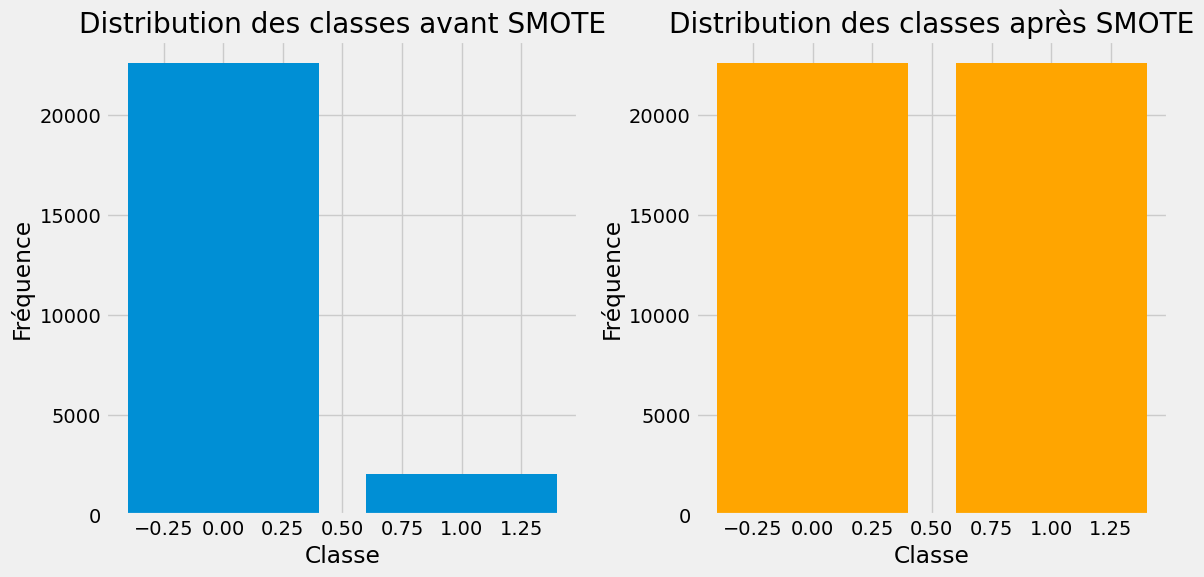

Forme de l'ensemble d'entraînement d'origine : (24600, 236)
Forme de l'ensemble d'entraînement rééchantillonné : (45162, 236)


In [52]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split



# Supprimer la cible des données d'entraînement
if 'TARGET' in app_train:
    train = app_train.drop(columns=['TARGET'])
else:
    train = app_train.copy()

# Noms des caractéristiques
features = list(train.columns)

# Copie des données de test
test = app_test.copy()

# Imputation médiane des valeurs manquantes
imputer = SimpleImputer(strategy='median')

# Échelle  entre 0 et 1
scaler = MinMaxScaler(feature_range=(0, 1))

# Ajuster sur les données d'entraînement
imputer.fit(train)

# Transformer les données d'entraînement et de test
train = imputer.transform(train)
test = imputer.transform(test)

# Répéter avec le scaler
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

# Convertir à nouveau en DataFrame
train_df = pd.DataFrame(train, columns=features)
test_df = pd.DataFrame(test, columns=features)

# Ajouter la cible au DataFrame
train_df['TARGET'] = app_train['TARGET']

# Séparer les données en caractéristiques et cible
X = train_df.drop(columns=['TARGET'])
y = train_df['TARGET']

# Diviser les données en ensembles d'entraînement et de validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Afficher la distribution des classes avant SMOTE
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].bar(y_train.value_counts().index, y_train.value_counts().values)
ax[0].set_title('Distribution des classes avant SMOTE')
ax[0].set_xlabel('Classe')
ax[0].set_ylabel('Fréquence')

# Appliquer SMOTE à l'ensemble d'entraînement
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Afficher la distribution des classes après SMOTE
ax[1].bar(y_train_smote.value_counts().index, y_train_smote.value_counts().values, color='orange')
ax[1].set_title('Distribution des classes après SMOTE')
ax[1].set_xlabel('Classe')
ax[1].set_ylabel('Fréquence')

plt.tight_layout()
plt.show()

# afficher la forme des ensembles d'entraînement d'origine et rééchantillonnés
print("Forme de l'ensemble d'entraînement d'origine :", X_train.shape)
print("Forme de l'ensemble d'entraînement rééchantillonné :", X_train_smote.shape)



In [53]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")  # Pour ignorer les avertissements si nécessaire

# Exemple de chargement de données
# Assurez-vous que train_df est défini ici
# train_df = pd.read_csv('votre_fichier.csv')  # Remplacez par le chemin vers votre fichier

# Sampling du dataset avec un pourcentage plus élevé
train_df_sample = train_df.sample(frac=0.01, random_state=42)  # Augmentez frac si nécessaire

# Split en features et target
X = train_df_sample.drop(columns=['TARGET'])
y = train_df_sample['TARGET']

# Split en training et validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Application de SMOTE avec un nombre de voisins réduit
smote = SMOTE(random_state=42, k_neighbors=2)  # Réduisez k_neighbors si nécessaire
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Print the shape of the original and resampled training sets
print("Original training set shape:", X_train.shape)
print("Resampled training set shape:", X_train_smote.shape)



Original training set shape: (246, 236)
Resampled training set shape: (448, 236)


In [54]:
X_train_smote

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,DAYS_EMPLOYED_ANOM
0,0.588135,0.000000,0.000000,1.000000,0.000000,0.002270,0.101124,0.086773,0.101124,0.392880,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.00000,0.000000,0.00000,0.0
1,0.459316,0.000000,0.000000,1.000000,0.000000,0.000731,0.087582,0.080443,0.059551,0.429796,...,0.0,0.0,0.0,0.0,0.00000,1.000000,0.00000,1.000000,0.00000,0.0
2,0.876329,0.000000,0.000000,1.000000,0.000000,0.001924,0.171764,0.337823,0.157303,0.088357,...,1.0,0.0,0.0,0.0,0.00000,0.000000,0.00000,1.000000,0.00000,0.0
3,0.363559,0.000000,0.000000,1.000000,0.000000,0.000923,0.124854,0.103240,0.101124,0.064665,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.00000,0.000000,0.00000,0.0
4,0.753841,1.000000,0.000000,1.000000,0.000000,0.000192,0.022472,0.020904,0.039326,0.245631,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.00000,0.000000,0.00000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,0.269432,0.739106,0.000000,0.260894,0.105587,0.001132,0.051296,0.045377,0.051296,0.174294,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.00000,0.000000,0.00000,0.0
444,0.277546,0.000000,0.015305,0.984695,0.000000,0.001068,0.123219,0.107119,0.099799,0.031412,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.00000,0.000000,0.00000,0.0
445,0.132480,0.000000,1.000000,0.000000,0.009509,0.000508,0.022135,0.047658,0.018122,0.467828,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.00000,0.000000,0.00000,0.0
446,0.417242,0.000000,0.000000,0.501040,0.000000,0.000558,0.190744,0.100877,0.157303,0.232904,...,0.0,0.0,0.0,0.0,0.49896,0.000000,0.50104,0.498960,0.50104,1.0


In [56]:
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error

# Configurer MLFlow
mlflow.set_tracking_uri("http://localhost:5000")


# Démarrer une exécution MLFlow
with mlflow.start_run() as run:
    # Entraîner un modèle Dummy Regressor
    model = DummyRegressor(strategy="mean")
    model.fit(X_train_smote, y_train_smote)

    # Faire des prédictions
    y_pred = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)

    # Enregistrer les paramètres et les métriques
    mlflow.log_param("model_type", "DummyRegressor")
    mlflow.log_metric("mse", mse)

    # Enregistrer le modèle
    mlflow.sklearn.log_model(model, "model")

    # Obtenir l'ID d'exécution
    run_id = run.info.run_id
    print(f"Run ID: {run_id}")

# Enregistrer le modèle
client = MlflowClient()
model_name = "DummyRegressorModel"
model_uri = f"runs:/{run_id}/model"

# Créer un modèle enregistré s'il n'existe pas
try:
    client.create_registered_model(model_name)
except Exception as e:
    print(f"Error creating registered model: {e}")

# Créer une nouvelle version du modèle
client.create_model_version(name=model_name, source=model_uri, run_id=run_id)

# Afficher les résultats
print("Model registered and tracked successfully.")
print("Mean Squared Error (MSE):", mse)



2024/07/26 17:19:13 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: DummyRegressorModel, version 1


Run ID: 5678e51c1dc644a581648746be454245
Model registered and tracked successfully.
Mean Squared Error (MSE): 0.25


In [57]:
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline  
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
# Configurer MLFlow
mlflow.set_tracking_uri("http://localhost:5000")  # Assurez-vous que l'interface utilisateur MLFlow est en cours d'exécution

# Définir la grille de paramètres pour Random Forest
param_grid_rf = {
    'randomforestclassifier__n_estimators': [100, 200],
    'randomforestclassifier__max_depth': [None, 10, 20],
    'randomforestclassifier__min_samples_split': [2, 5, 10]
}

# Créer un pipeline avec SMOTE et Random Forest
pipeline_rf = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('scaler', StandardScaler()),
    ('randomforestclassifier', RandomForestClassifier(random_state=42))
])

# Validateur croisé Stratified K-Folds
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Démarrer une exécution MLFlow
with mlflow.start_run() as run:
    # Recherche en grille avec validation croisée
    grid_search_rf = GridSearchCV(estimator=pipeline_rf, param_grid=param_grid_rf, cv=cv, scoring='roc_auc', n_jobs=-1, verbose=2)
    grid_search_rf.fit(X_train_smote, y_train_smote)

    # Enregistrer les paramètres et les métriques
    mlflow.log_params(grid_search_rf.best_params_)
    y_val_pred_rf = grid_search_rf.predict(X_val)
    y_val_pred_proba_rf = grid_search_rf.predict_proba(X_val)[:, 1]
    roc_auc = roc_auc_score(y_val, y_val_pred_proba_rf)
    accuracy = accuracy_score(y_val, y_val_pred_rf)

    mlflow.log_metric("roc_auc", roc_auc)
    mlflow.log_metric("accuracy", accuracy)

    # Enregistrer le modèle
    mlflow.sklearn.log_model(grid_search_rf.best_estimator_, "model")

    # Obtenir l'ID d'exécution
    run_id = run.info.run_id
    print(f"Run ID: {run_id}")

# Enregistrer le modèle
client = MlflowClient()
model_name = "RandomForestModel"
model_uri = f"runs:/{run_id}/model"

# Créer un modèle enregistré s'il n'existe pas
try:
    client.create_registered_model(model_name)
except Exception as e:
    print(f"Error creating registered model: {e}")

# Créer une nouvelle version du modèle
client.create_model_version(name=model_name, source=model_uri, run_id=run_id)

# Afficher les résultats
print("Model registered and tracked successfully.")
print("Best parameters found: ", grid_search_rf.best_params_)
print("Best estimator: ", grid_search_rf.best_estimator_)
print("Random Forest Classification Report:\n", classification_report(y_val, y_val_pred_rf))
print("Random Forest ROC AUC Score:", roc_auc)
print("Random Forest Accuracy Score:", accuracy)



Fitting 5 folds for each of 18 candidates, totalling 90 fits


2024/07/26 17:19:26 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: RandomForestModel, version 1


Run ID: 11279d5caf3944afb532cb473f78eebc
Model registered and tracked successfully.
Best parameters found:  {'randomforestclassifier__max_depth': None, 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__n_estimators': 200}
Best estimator:  Pipeline(steps=[('smote', SMOTE(random_state=42)), ('scaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(n_estimators=200, random_state=42))])
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        57
           1       0.00      0.00      0.00         5

    accuracy                           0.92        62
   macro avg       0.46      0.50      0.48        62
weighted avg       0.85      0.92      0.88        62

Random Forest ROC AUC Score: 0.5035087719298246
Random Forest Accuracy Score: 0.9193548387096774


In [58]:
from sklearn.svm import SVC  # Importer SVC pour le modèle SVM
mlflow.set_tracking_uri("http://localhost:5000")  # Assurez-vous que l'interface utilisateur MLFlow est en cours d'exécution

# Définir la grille de paramètres pour SVM
param_grid = {
    'svc__C': [0.1, 1, 10],
    'svc__gamma': ['scale', 'auto'],
    'svc__kernel': ['linear', 'rbf']
}

# Créer un pipeline avec SMOTE, scaler, et SVM
pipeline_svm = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('scaler', StandardScaler()),
    ('svc', SVC(probability=True, random_state=42))
])

# Validateur croisé Stratified K-Folds
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Démarrer une exécution MLFlow
with mlflow.start_run() as run:
    # Recherche en grille avec validation croisée
    grid_search_svm = GridSearchCV(estimator=pipeline_svm, param_grid=param_grid, cv=cv, scoring='roc_auc', n_jobs=-1, verbose=2)
    grid_search_svm.fit(X_train_smote, y_train_smote)

    # Enregistrer les paramètres et les métriques
    mlflow.log_params(grid_search_svm.best_params_)
    y_val_pred_svm = grid_search_svm.predict(X_val)
    y_val_pred_proba_svm = grid_search_svm.predict_proba(X_val)[:, 1]
    roc_auc = roc_auc_score(y_val, y_val_pred_proba_svm)
    accuracy = accuracy_score(y_val, y_val_pred_svm)

    mlflow.log_metric("roc_auc", roc_auc)
    mlflow.log_metric("accuracy", accuracy)

    # Enregistrer le modèle
    mlflow.sklearn.log_model(grid_search_svm.best_estimator_, "model")

    # Obtenir l'ID d'exécution
    run_id = run.info.run_id
    print(f"Run ID: {run_id}")

# Enregistrer le modèle
client = MlflowClient()
model_name = "SVMModel"
model_uri = f"runs:/{run_id}/model"

# Créer un modèle enregistré s'il n'existe pas
try:
    client.create_registered_model(model_name)
except Exception as e:
    print(f"Error creating registered model: {e}")

# Créer une nouvelle version du modèle
client.create_model_version(name=model_name, source=model_uri, run_id=run_id)

# Afficher les résultats
print("Model registered and tracked successfully.")
print("Best parameters found: ", grid_search_svm.best_params_)
print("Best estimator: ", grid_search_svm.best_estimator_)
print("SVM Classification Report:\n", classification_report(y_val, y_val_pred_svm))
print("SVM ROC AUC Score:", roc_auc)
print("SVM Accuracy Score:", accuracy)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


2024/07/26 17:19:29 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: SVMModel, version 1


Run ID: 6dec98723d774156ba9def07445a33bf
Model registered and tracked successfully.
Best parameters found:  {'svc__C': 1, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
Best estimator:  Pipeline(steps=[('smote', SMOTE(random_state=42)), ('scaler', StandardScaler()),
                ('svc', SVC(C=1, probability=True, random_state=42))])
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94        57
           1       0.00      0.00      0.00         5

    accuracy                           0.89        62
   macro avg       0.46      0.48      0.47        62
weighted avg       0.84      0.89      0.86        62

SVM ROC AUC Score: 0.6842105263157895
SVM Accuracy Score: 0.8870967741935484


In [59]:
# Configurer MLFlow
mlflow.set_tracking_uri("http://localhost:5000")

# Définir la grille de paramètres pour XGBoost
param_grid_xgb = {
    'xgbclassifier__n_estimators': [100, 200],
    'xgbclassifier__max_depth': [3, 6, 10],
    'xgbclassifier__learning_rate': [0.01, 0.1, 0.2],
    'xgbclassifier__subsample': [0.8, 1.0],
    'xgbclassifier__colsample_bytree': [0.8, 1.0]
}

# Créer un pipeline avec SMOTE et XGBoost
pipeline_xgb = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('scaler', StandardScaler()),
    ('xgbclassifier', xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'))
])

# Validaion croisée Stratified K-Folds
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Démarrer une exécution MLFlow
with mlflow.start_run() as run:
    # Recherche en grille avec validation croisée
    grid_search_xgb = GridSearchCV(estimator=pipeline_xgb, param_grid=param_grid_xgb, cv=cv, scoring='roc_auc', n_jobs=-1, verbose=2)
    grid_search_xgb.fit(X_train_smote, y_train_smote)

    # Enregistrer les paramètres et les métriques
    mlflow.log_params(grid_search_xgb.best_params_)
    y_val_pred_xgb = grid_search_xgb.predict(X_val)
    y_val_pred_proba_xgb = grid_search_xgb.predict_proba(X_val)[:, 1]
    roc_auc = roc_auc_score(y_val, y_val_pred_proba_xgb)
    accuracy = accuracy_score(y_val, y_val_pred_xgb)

    mlflow.log_metric("roc_auc", roc_auc)
    mlflow.log_metric("accuracy", accuracy)

    # Enregistrer le modèle
    mlflow.sklearn.log_model(grid_search_xgb.best_estimator_, "model")

    # Obtenir l'ID d'exécution
    run_id = run.info.run_id
    print(f"Run ID: {run_id}")

# Enregistrer le modèle
client = MlflowClient()
model_name = "XGBoostModel"
model_uri = f"runs:/{run_id}/model"

# Créer un modèle enregistré
try:
    client.create_registered_model(model_name)
except Exception as e:
    print(f"Error creating registered model: {e}")

# Créer une nouvelle version du modèle
client.create_model_version(name=model_name, source=model_uri, run_id=run_id)

# Afficher les résultats
print("Model registered and tracked successfully.")
print("Best parameters found: ", grid_search_xgb.best_params_)
print("Best estimator: ", grid_search_xgb.best_estimator_)
print("XGBoost Classification Report:\n", classification_report(y_val, y_val_pred_xgb))
print("XGBoost ROC AUC Score:", roc_auc)
print("XGBoost Accuracy Score:", accuracy)





Fitting 5 folds for each of 72 candidates, totalling 360 fits


2024/07/26 17:19:51 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: XGBoostModel, version 1


Run ID: b0e02092c28e497fbd430af31a626829
Model registered and tracked successfully.
Best parameters found:  {'xgbclassifier__colsample_bytree': 0.8, 'xgbclassifier__learning_rate': 0.1, 'xgbclassifier__max_depth': 10, 'xgbclassifier__n_estimators': 100, 'xgbclassifier__subsample': 0.8}
Best estimator:  Pipeline(steps=[('smote', SMOTE(random_state=42)), ('scaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=0.8, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='logloss',
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bi

In [60]:
X_train_smote


,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,DAYS_EMPLOYED_ANOM
0,0.588135,0.000000,0.000000,1.000000,0.000000,0.002270,0.101124,0.086773,0.101124,0.392880,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.00000,0.000000,0.00000,0.0
1,0.459316,0.000000,0.000000,1.000000,0.000000,0.000731,0.087582,0.080443,0.059551,0.429796,...,0.0,0.0,0.0,0.0,0.00000,1.000000,0.00000,1.000000,0.00000,0.0
2,0.876329,0.000000,0.000000,1.000000,0.000000,0.001924,0.171764,0.337823,0.157303,0.088357,...,1.0,0.0,0.0,0.0,0.00000,0.000000,0.00000,1.000000,0.00000,0.0
3,0.363559,0.000000,0.000000,1.000000,0.000000,0.000923,0.124854,0.103240,0.101124,0.064665,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.00000,0.000000,0.00000,0.0
4,0.753841,1.000000,0.000000,1.000000,0.000000,0.000192,0.022472,0.020904,0.039326,0.245631,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.00000,0.000000,0.00000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,0.269432,0.739106,0.000000,0.260894,0.105587,0.001132,0.051296,0.045377,0.051296,0.174294,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.00000,0.000000,0.00000,0.0
444,0.277546,0.000000,0.015305,0.984695,0.000000,0.001068,0.123219,0.107119,0.099799,0.031412,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.00000,0.000000,0.00000,0.0
445,0.132480,0.000000,1.000000,0.000000,0.009509,0.000508,0.022135,0.047658,0.018122,0.467828,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.00000,0.000000,0.00000,0.0
446,0.417242,0.000000,0.000000,0.501040,0.000000,0.000558,0.190744,0.100877,0.157303,0.232904,...,0.0,0.0,0.0,0.0,0.49896,0.000000,0.50104,0.498960,0.50104,1.0


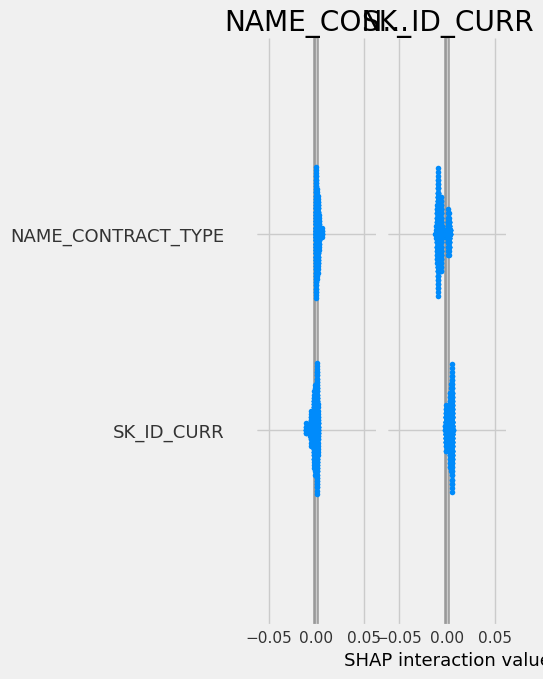

In [61]:
import shap
 # SHAP analysis
explainer = shap.TreeExplainer(grid_search_rf.best_estimator_.named_steps['randomforestclassifier'])
shap_values = explainer.shap_values(X_train_smote)
feature = ["K_ID_CURR","NAME_CONTRACT_TYPE","FLAG_OWN_CAR"]
 

# Plot feature importance
shap.summary_plot(shap_values, X_train_smote.columns, plot_type="bar")

In [62]:
# Sauvegarder le pipeline complet
import mlflow
import mlflow.sklearn

mlflow.sklearn.log_model(grid_search_xgb.best_estimator_, "model_pipeline")

In [63]:
import mlflow
import mlflow.sklearn
from imblearn.pipeline import Pipeline as ImbalancedPipeline
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report
from mlflow.exceptions import MlflowException  # Importer MlflowException

# Define parameter grid for XGBoost
param_grid_xgb = {
    'xgbclassifier__n_estimators': [100, 200],
    'xgbclassifier__max_depth': [3, 6, 10],
    'xgbclassifier__learning_rate': [0.01, 0.1, 0.2],
    'xgbclassifier__subsample': [0.8, 1.0],
    'xgbclassifier__colsample_bytree': [0.8, 1.0]
}

# Create pipeline with SMOTE and XGBoost
pipeline_xgb = ImbalancedPipeline([
    ('smote', SMOTE(random_state=42)),
    ('scaler', StandardScaler()),
    ('xgbclassifier', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'))
])

# Stratified K-Folds cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Ensure no active MLflow run
if mlflow.active_run() is not None:
    mlflow.end_run()

# Start MLflow run
with mlflow.start_run() as run:
    # Grid search with cross-validation
    grid_search_xgb = GridSearchCV(estimator=pipeline_xgb, param_grid=param_grid_xgb, cv=cv, scoring='roc_auc', n_jobs=-1, verbose=2)
    grid_search_xgb.fit(X_train_smote, y_train_smote)

    # Log parameters and metrics
    mlflow.log_params(grid_search_xgb.best_params_)
    y_val_pred_xgb = grid_search_xgb.predict(X_val)
    y_val_pred_proba_xgb = grid_search_xgb.predict_proba(X_val)[:, 1]
    roc_auc = roc_auc_score(y_val, y_val_pred_proba_xgb)
    accuracy = accuracy_score(y_val, y_val_pred_xgb)

    mlflow.log_metric("roc_auc", roc_auc)
    mlflow.log_metric("accuracy", accuracy)

    # Log the model
    mlflow.sklearn.log_model(grid_search_xgb.best_estimator_, "model_pipeline")

    # Get the run ID
    run_id = run.info.run_id
    print(f"Run ID: {run_id}")

# Register the model
client = mlflow.tracking.MlflowClient()
model_name = "XGBoostModelPipeline"
model_uri = f"runs:/{run_id}/model_pipeline"

# Check if the model already exists
try:
    client.create_registered_model(model_name)
except MlflowException as e:
    if "already exists" not in str(e):
        print(f"Error creating registered model: {e}")

# Create a new model version
try:
    client.create_model_version(name=model_name, source=model_uri, run_id=run_id)
except MlflowException as e:
    print(f"Error creating model version: {e}")

# Print results
print("Model registered and tracked successfully.")
print("Best parameters found: ", grid_search_xgb.best_params_)
print("Best estimator: ", grid_search_xgb.best_estimator_)
print("XGBoost Classification Report:\n", classification_report(y_val, y_val_pred_xgb))
print("XGBoost ROC AUC Score:", roc_auc)
print("XGBoost Accuracy Score:", accuracy)






Fitting 5 folds for each of 72 candidates, totalling 360 fits


2024/07/26 17:20:16 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: XGBoostModelPipeline, version 1


Run ID: 1c13bb2640084c1d9135976150bc2639
Model registered and tracked successfully.
Best parameters found:  {'xgbclassifier__colsample_bytree': 0.8, 'xgbclassifier__learning_rate': 0.1, 'xgbclassifier__max_depth': 10, 'xgbclassifier__n_estimators': 100, 'xgbclassifier__subsample': 0.8}
Best estimator:  Pipeline(steps=[('smote', SMOTE(random_state=42)), ('scaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=0.8, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='logloss',
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bi

In [64]:




# Créez un DataFrame avec les caractéristiques et les étiquettes
df_export = X_train_smote.copy()
df_export['TARGET'] = y_train_smote

# Exporter le DataFrame en CSV
df_export.to_csv('X_train_smote.csv', index=False)

print("Dataset exported successfully.")


Dataset exported successfully.


In [65]:
X_train_smote

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,DAYS_EMPLOYED_ANOM
0,0.588135,0.000000,0.000000,1.000000,0.000000,0.002270,0.101124,0.086773,0.101124,0.392880,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.00000,0.000000,0.00000,0.0
1,0.459316,0.000000,0.000000,1.000000,0.000000,0.000731,0.087582,0.080443,0.059551,0.429796,...,0.0,0.0,0.0,0.0,0.00000,1.000000,0.00000,1.000000,0.00000,0.0
2,0.876329,0.000000,0.000000,1.000000,0.000000,0.001924,0.171764,0.337823,0.157303,0.088357,...,1.0,0.0,0.0,0.0,0.00000,0.000000,0.00000,1.000000,0.00000,0.0
3,0.363559,0.000000,0.000000,1.000000,0.000000,0.000923,0.124854,0.103240,0.101124,0.064665,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.00000,0.000000,0.00000,0.0
4,0.753841,1.000000,0.000000,1.000000,0.000000,0.000192,0.022472,0.020904,0.039326,0.245631,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.00000,0.000000,0.00000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,0.269432,0.739106,0.000000,0.260894,0.105587,0.001132,0.051296,0.045377,0.051296,0.174294,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.00000,0.000000,0.00000,0.0
444,0.277546,0.000000,0.015305,0.984695,0.000000,0.001068,0.123219,0.107119,0.099799,0.031412,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.00000,0.000000,0.00000,0.0
445,0.132480,0.000000,1.000000,0.000000,0.009509,0.000508,0.022135,0.047658,0.018122,0.467828,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.00000,0.000000,0.00000,0.0
446,0.417242,0.000000,0.000000,0.501040,0.000000,0.000558,0.190744,0.100877,0.157303,0.232904,...,0.0,0.0,0.0,0.0,0.49896,0.000000,0.50104,0.498960,0.50104,1.0


test unitaires, deploiement sur le cloud, data drift.